## Pandas基础
内容：
* pandas DataFrame（数据框）
* pandas Series
* 数据的选择
* 案例：Iris 鸢尾花数据
    * 数据的导入和观察
    * 数据选择复习
    * 数据可视化初探

## 1. Pandas DataFrame
  我们存储数据最常用的形式是表格
  - 表格就是由行与列所构成的一种有序的组织形式
  - 表格的第一行一般是变量名称，也称为表头（header）
  - 不同的变量可以是不同的数据类型。

比如下面这个表格罗列了2016年GDP最高的5个国家以及对应的首都，人口(百万)，GDP（万亿美元），和所在大洲

|country|capital|population|GDP|continent|
|--|--|--|--|--|
|United States|Washington, D.C.|323|19.42|North America|
|China|Beijing|1389|11.8|Asia|
|Japan|Tokyo|127|4.84|Asia|
|Germany|Berlin|83|3.42|Europe|
|United Kingdom|London|66|2.5|Europe|

**问题：如何在python中表示以上这个表格？**
* 在第四节课中，我们介绍了二维numpy array。但是numpy array只能存储一种数据类型，但是上面的表格同时有数值变量和字符串。
* 我们需要使用pandas包来处理
    * pandas是数据科学中最常用的包之一，可以高效的处理各种数据格式。
    * pandas是基于numpy构建的
    * 我们将重点介绍pandas中的series和DataFrame

In [1]:
import pandas as pd
# 先定义一个名为gdp的字典，其中key相当于之后df的列名，value对应各列具体值
gdp={"country":["United State","China", "Japan", "Germany", "United Kingdom"],
    "capital":["Washington,D.C.","Beijing","Tokyo", "Berlin", "London"],
    "population":[323,1389,127,83,66],
    "gdp":[19.42,11.8,4.84,3.42,2.5],
    "continent":["North America", "Asia", "Asia", "Europe", "Europe"]}

In [3]:
# 使用pd.DataFrame函数将字典gdp转化为df格式的gdp_df
gdp_df1=pd.DataFrame(gdp)
gdp_df1

,capital,continent,country,gdp,population
0,"Washington,D.C.",North America,United State,19.42,323
1,Beijing,Asia,China,11.80,1389
2,Tokyo,Asia,Japan,4.84,127
3,Berlin,Europe,Germany,3.42,83
4,London,Europe,United Kingdom,2.50,66


In [4]:
# 调整df表格,注意此处columns用于对列排序，而不是修改列名
gdp_df2=pd.DataFrame(gdp, 
                     columns=["country","capital","population","gdp","continent"], 
                     index=["us","cn","jp","de","uk"])
gdp_df2

,country,capital,population,gdp,continent
us,United State,"Washington,D.C.",323,19.42,North America
cn,China,Beijing,1389,11.80,Asia
jp,Japan,Tokyo,127,4.84,Asia
de,Germany,Berlin,83,3.42,Europe
uk,United Kingdom,London,66,2.50,Europe


In [5]:
#修改行／列的标签  注意此处columns用于修改列名
gdp_df2.columns=["Country","Capital","Population","GDP","Continent"]
gdp_df2.index=["US","CN","JP","DE","UK"]
gdp_df2

,Country,Capital,Population,GDP,Continent
US,United State,"Washington,D.C.",323,19.42,North America
CN,China,Beijing,1389,11.80,Asia
JP,Japan,Tokyo,127,4.84,Asia
DE,Germany,Berlin,83,3.42,Europe
UK,United Kingdom,London,66,2.50,Europe


In [6]:
#增加一列数据
gdp_df2["Rank"]="Top5 GDP"
gdp_df2["Area"]=[9.15,9.38,0.37,0.35,0.24]
gdp_df2

,Country,Capital,Population,GDP,Continent,Rank,Area
US,United State,"Washington,D.C.",323,19.42,North America,Top5 GDP,9.15
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37
DE,Germany,Berlin,83,3.42,Europe,Top5 GDP,0.35
UK,United Kingdom,London,66,2.50,Europe,Top5 GDP,0.24


## 2. Pandas Series
  - pandas中的series对象是另一个重要的数据结构
  - 可以将其视为一个一维的DataFrame或者一个一维数组（array）加上一个索引（index）
  - 代码的后半部分，将展示series在数据过滤和分组运算中起到作用

In [7]:
s=pd.Series([1,3,5,7,9],index=["a","b","c","d","e"])
print(s)

a    1
b    3
c    5
d    7
e    9
dtype: int64


In [8]:
#对于DataFrame，当使用.操作提取DF列时，返回的数据是Series格式,Series的索引即为DF的索引
print(gdp_df2.GDP)
print(gdp_df2.GDP.index)
print(type(gdp_df2))
print(type(gdp_df2.GDP))

#两种从DF中选取列的方法，都返回Series格式
gdp_df2.GDP
gdp_df2["GDP"]

US    19.42
CN    11.80
JP     4.84
DE     3.42
UK     2.50
Name: GDP, dtype: float64
Index(['US', 'CN', 'JP', 'DE', 'UK'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


US    19.42
CN    11.80
JP     4.84
DE     3.42
UK     2.50
Name: GDP, dtype: float64

In [9]:
#对DF某列值进行判断，返回Bool Series
gdp_df2.Area>5

US     True
CN     True
JP    False
DE    False
UK    False
Name: Area, dtype: bool

In [10]:
#判断 US 是否在Series gdp_df2.GDP中，返回Bool值
"US" in gdp_df2.GDP

True

## 3. 数据的选择
   - 使用[[]]选择需要的列，得到得到数据类型是dataframe
   - 只使用[]也可以选择列，不过得到的数据类型是series
   - 使用.也可以选择列，得到的数据类型是series
   - 使用[]选择需要的行（切片）
   - 使用loc,iloc，选择行和列
   - 使用布尔型索引筛选数据

In [11]:
gdp_df2

,Country,Capital,Population,GDP,Continent,Rank,Area
US,United State,"Washington,D.C.",323,19.42,North America,Top5 GDP,9.15
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37
DE,Germany,Berlin,83,3.42,Europe,Top5 GDP,0.35
UK,United Kingdom,London,66,2.50,Europe,Top5 GDP,0.24


In [12]:
# 列的选择： [],[[]], .

print(type(gdp_df2["Country"]))  #只使用[]也可以选择列，不过得到的数据类型是series

print(gdp_df2.Country) #使用.也可以选择列，得到的结果是series

gdp_df2[["Country","GDP"]] #选择gdp_df2的Country, GDP列，可以选择多列

<class 'pandas.core.series.Series'>
US      United State
CN             China
JP             Japan
DE           Germany
UK    United Kingdom
Name: Country, dtype: object


,Country,GDP
US,United State,19.42
CN,China,11.80
JP,Japan,4.84
DE,Germany,3.42
UK,United Kingdom,2.50


In [13]:
# 行的选择：切片
gdp_df2[1:4]  # 选择gdp_df2的第2,3,4行（index=1,2,3），不包含第5行（index=4）

,Country,Capital,Population,GDP,Continent,Rank,Area
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37
DE,Germany,Berlin,83,3.42,Europe,Top5 GDP,0.35


### loc方法选择数据
   - 基于行列 **标签** 选取数据的方法
   - 可以选取特定的行或列，可以同时指定需要的行和列
   - 与二维numpy array格式很相似

In [14]:
# 选取DF标签为CN、JP的行
gdp_df2.loc[["CN","JP"]]

,Country,Capital,Population,GDP,Continent,Rank,Area
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37


In [15]:
# 选取DF标签为CN，JP的行，同时选取标签为GDP, Area，Population的列
gdp_df2.loc[["CN","JP"],["GDP","Area","Population"]]
gdp_df2.loc[:,["GDP","Area","Population"]]

,GDP,Area,Population
US,19.42,9.15,323
CN,11.80,9.38,1389
JP,4.84,0.37,127
DE,3.42,0.35,83
UK,2.50,0.24,66


### iloc方法选择数据
   - iloc基于行列 **索引** 选择数据
   - 使用方法与loc类似，只是用行列索引代替行列标签

In [16]:
print(gdp_df2.loc[["CN","JP","DE"]])
gdp_df2.iloc[[1,2,3]]  #与上一行代码等价

    Country  Capital  Population    GDP Continent      Rank  Area
CN    China  Beijing        1389  11.80      Asia  Top5 GDP  9.38
JP    Japan    Tokyo         127   4.84      Asia  Top5 GDP  0.37
DE  Germany   Berlin          83   3.42    Europe  Top5 GDP  0.35


,Country,Capital,Population,GDP,Continent,Rank,Area
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37
DE,Germany,Berlin,83,3.42,Europe,Top5 GDP,0.35


In [17]:
print(gdp_df2.loc[["CN","JP"],["GDP","Area","Population"]])
gdp_df2.iloc[[1,2],[2,3,6]] #与上一行代码等价

      GDP  Area  Population
CN  11.80  9.38        1389
JP   4.84  0.37         127


,Population,GDP,Area
CN,1389,11.80,9.38
JP,127,4.84,0.37


In [18]:
gdp_df2.iloc[:,[2,3,6]]

,Population,GDP,Area
US,323,19.42,9.15
CN,1389,11.80,9.38
JP,127,4.84,0.37
DE,83,3.42,0.35
UK,66,2.50,0.24


### 使用布尔型索引筛选数据
   - 布尔型索引返回True、False，DF会筛选True的元素行列返回（我的理解）
   - 可以使用pandas series来获取一个boolean series，然后结合[]、loc 共同筛选数据组中的元素

In [19]:
 #找出数据组中的亚洲国家，其中gdp_df.Continent=="Asia" 返回boolean,对于亚洲国家返回True，否则返回False，然后使用gdp_df[bool]选择为True的行
print(gdp_df2.Continent=="Asia")
gdp_df2[gdp_df2.Continent=="Asia"]

US    False
CN     True
JP     True
DE    False
UK    False
Name: Continent, dtype: bool


,Country,Capital,Population,GDP,Continent,Rank,Area
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37


In [20]:
gdp_df2.loc[gdp_df2.Continent=="Asia"]

,Country,Capital,Population,GDP,Continent,Rank,Area
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37


In [21]:
# 找出GDP大于3兆亿的欧洲国家 方法一
gdp_df2.loc[(gdp_df2.GDP>3) & (gdp_df2.Continent=="Europe")]

,Country,Capital,Population,GDP,Continent,Rank,Area
DE,Germany,Berlin,83,3.42,Europe,Top5 GDP,0.35


In [22]:
# 找出GDP大于3兆亿的欧洲国家 方法二
gdp_df2[(gdp_df2.GDP>3) & (gdp_df2.Continent=="Europe")]

,Country,Capital,Population,GDP,Continent,Rank,Area
DE,Germany,Berlin,83,3.42,Europe,Top5 GDP,0.35


In [23]:
gdp_df2[gdp_df2.GDP>4]

,Country,Capital,Population,GDP,Continent,Rank,Area
US,United State,"Washington,D.C.",323,19.42,North America,Top5 GDP,9.15
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37


In [24]:
# 选出亚洲或者北美洲的国家
gdp_df2[(gdp_df2.Continent=="Asia") | (gdp_df2.Continent=="North America")]

,Country,Capital,Population,GDP,Continent,Rank,Area
US,United State,"Washington,D.C.",323,19.42,North America,Top5 GDP,9.15
CN,China,Beijing,1389,11.80,Asia,Top5 GDP,9.38
JP,Japan,Tokyo,127,4.84,Asia,Top5 GDP,0.37


### 课堂练习1：选出gdp大于4兆亿美元的国家

## 4. 鸢尾花数据的处理

In [4]:
# 读取鸢尾花数据集，并给每列取名
iris=pd.read_csv("D:\DM\python\iris.txt")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 使用shape可以查看DataFrame的行数与列数
# iris有150个观察值，5个变量
iris.info()
iris.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


(150, 5)

In [32]:
#统计不同种类的鸢尾花数量
iris.species.unique()
iris.species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

### 课堂练习2：用三种方法选取花瓣数据，即 petal_length 和 petal_width 这两列

In [39]:
petal=iris[["petal_length","petal_width"]]
petal2=iris.iloc[:,[2,3]]
petal.head()
petal2.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### 课堂练习3：用两种方法选取行索引为5-10的数据行

In [41]:
iris[5:11]
iris.iloc[5:11,:]

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa


### 课堂练习4：选取品种为 Iris-versicolor 的数据

In [43]:
iris[iris.species=="Iris-versicolor"].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


## 5. 鸢尾花数据可视化初探
   - 数据可视化一般是数据分析的第一步，让我们对数据有一个直观的了解。
   - 通过可视化，我们往往可以观察到一些规律，这些观察到的规律可以对后续的建模起到指导作用。
   - 可视化也是和非技术背景人沟通最有效的手段之一，不是所有人都懂得模型，但是大部分都可以理解图形

#### 散点图

In [45]:
#jupyter notebook里的命令, 意思是将那些用matplotlib绘制的图显示在页面里,而不是弹出一个窗口
%matplotlib inline  

#设置图片清晰度
%config InlineBackend.figure_format = "retina"

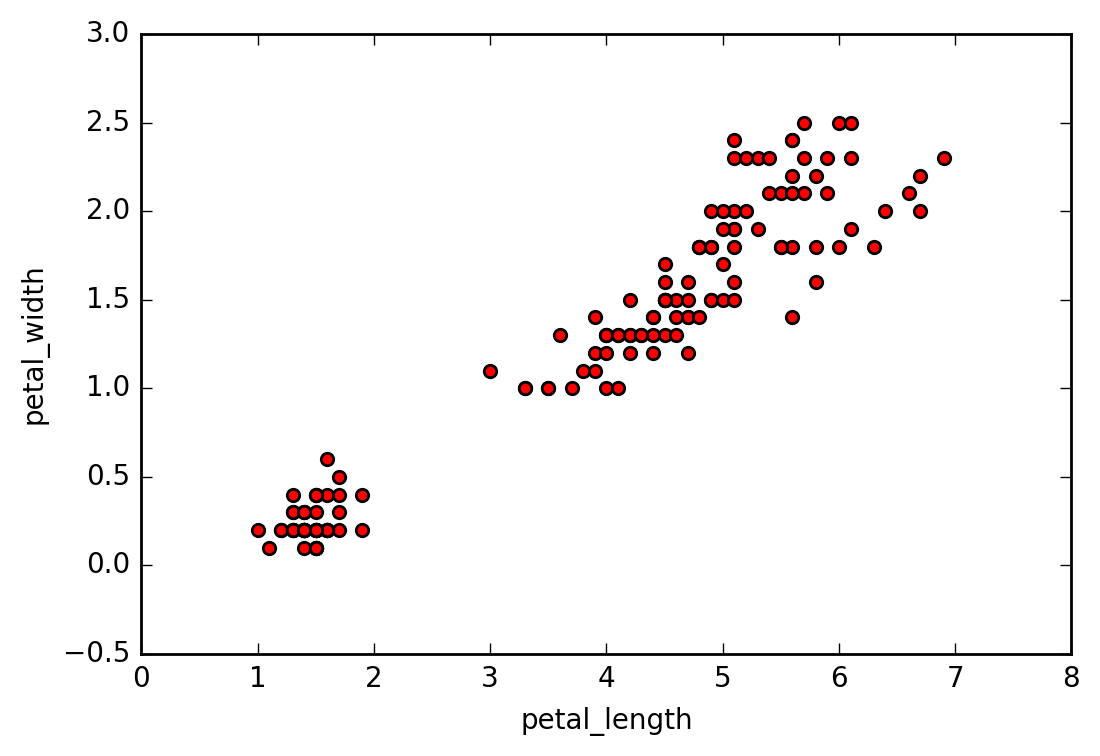

In [47]:
# kind="scatter",做散点图，x轴表示花瓣长度，y轴表示花瓣宽度
iris.plot(kind="scatter",color="red",x="petal_length",y="petal_width")

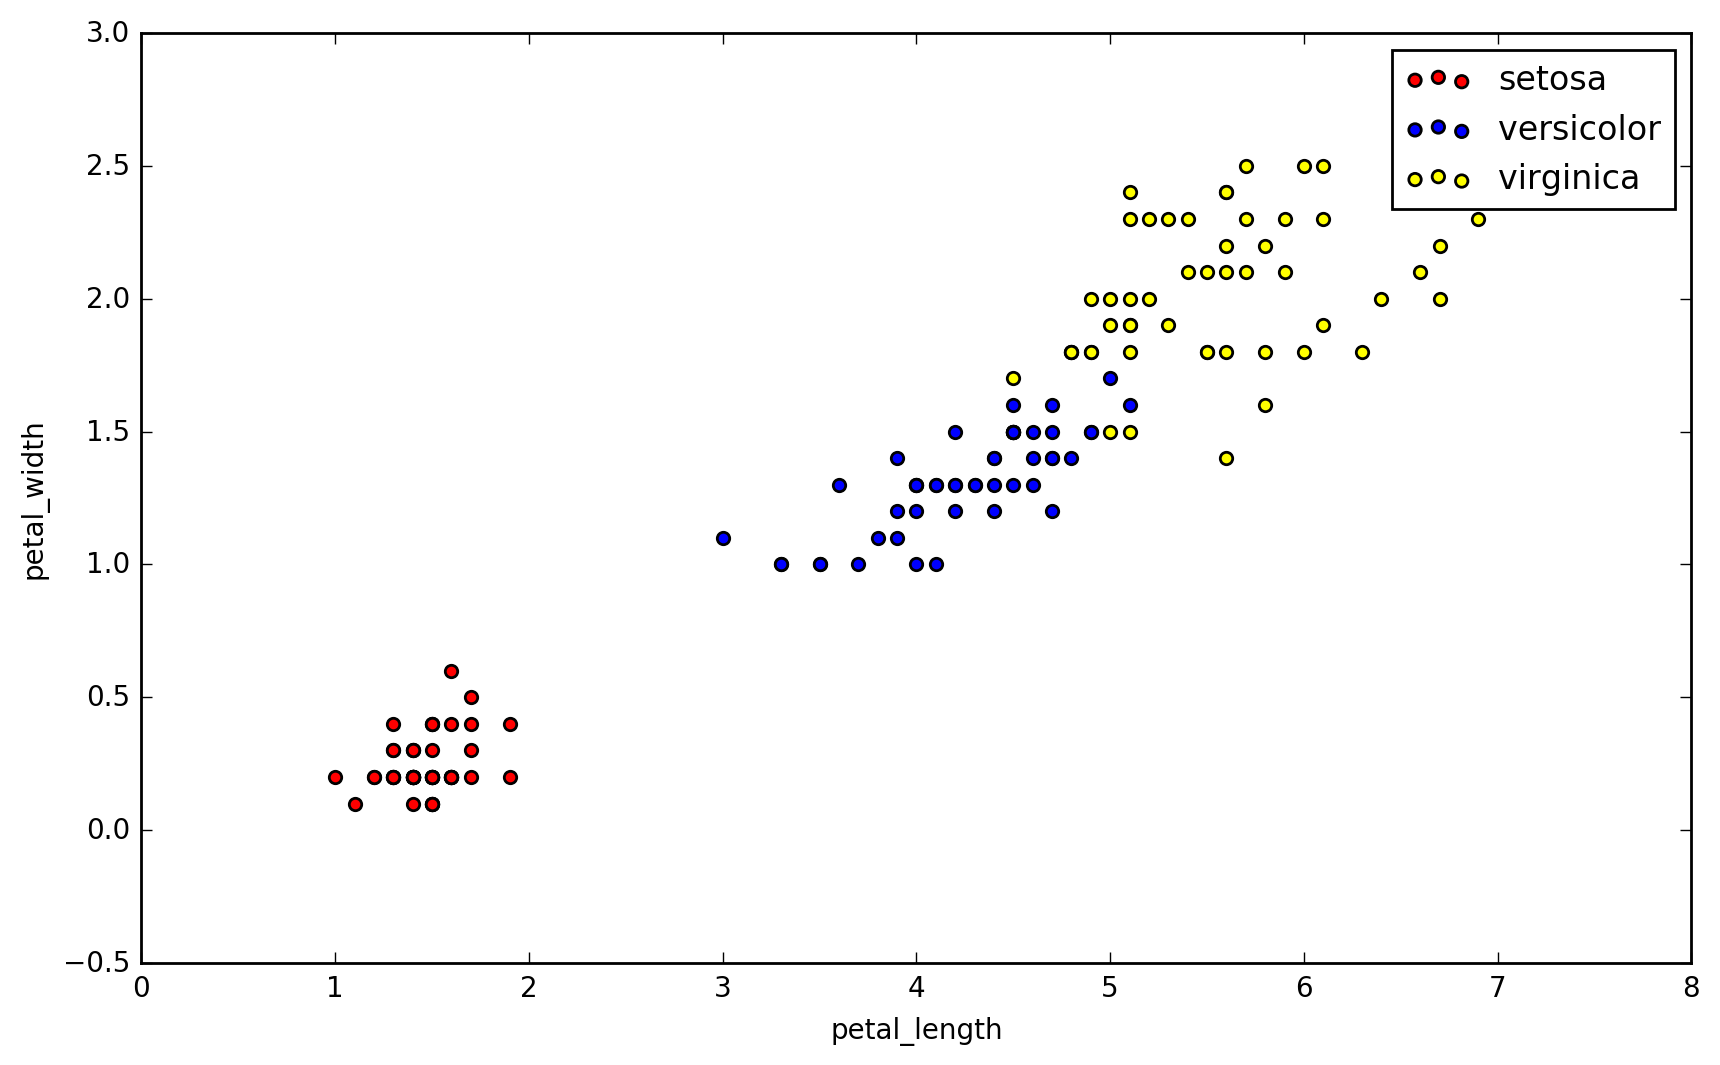

In [55]:
# 使用布尔型索引，分别获取三种类型鸢尾花的数据集
setosa=iris[iris.species=="Iris-setosa"]
versicolor=iris[iris.species=="Iris-versicolor"]
virginica=iris[iris.species=="Iris-virginica"]

#作图，setosa数据散点图ax
ax = setosa.plot(kind="scatter",x="petal_length",y="petal_width",color="red",label="setosa",figsize=(10,6))
#将其余两种类型的花数据也作图在ax上
versicolor.plot(ax=ax,kind="scatter",x="petal_length",y="petal_width",color="blue",label="versicolor")
virginica.plot(ax=ax,kind="scatter",x="petal_length",y="petal_width",color="yellow",label="virginica")

#### 箱图

In [58]:
iris.petal_width.mean()
setosa.petal_width.mean()

0.2439999999999999

In [59]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


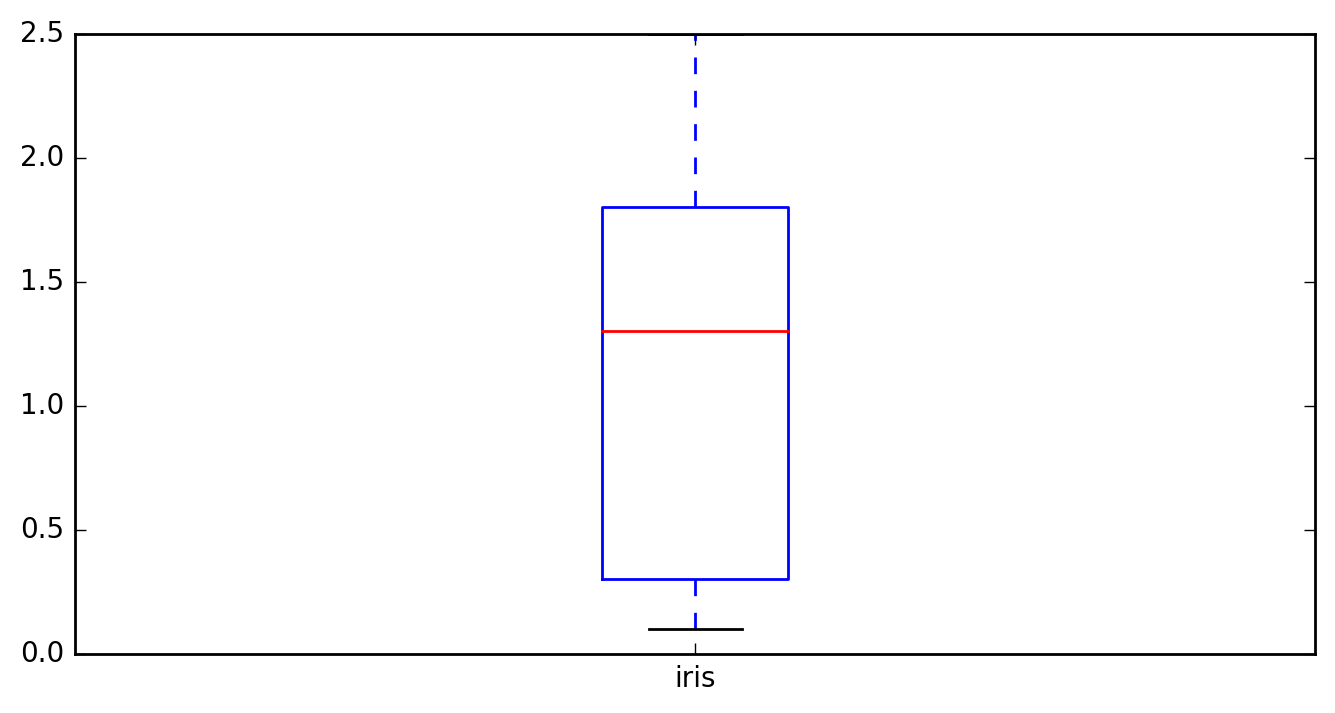

In [69]:
iris.petal_width.plot(kind="box",label="iris",figsize=(8,4)) #kind="box"作箱图

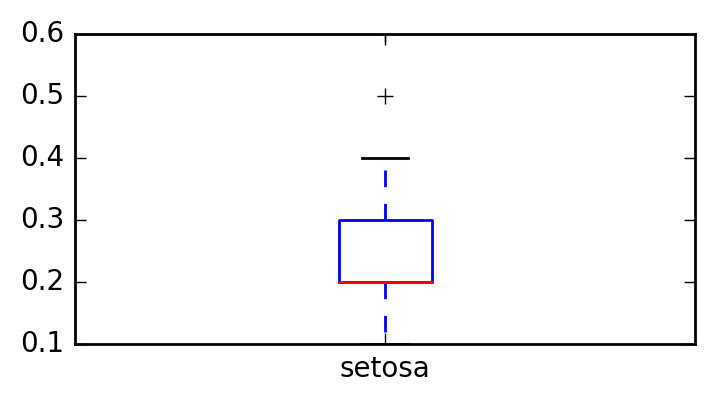

In [71]:
setosa.petal_width.plot(kind="box",label="setosa",figsize=(4,2))

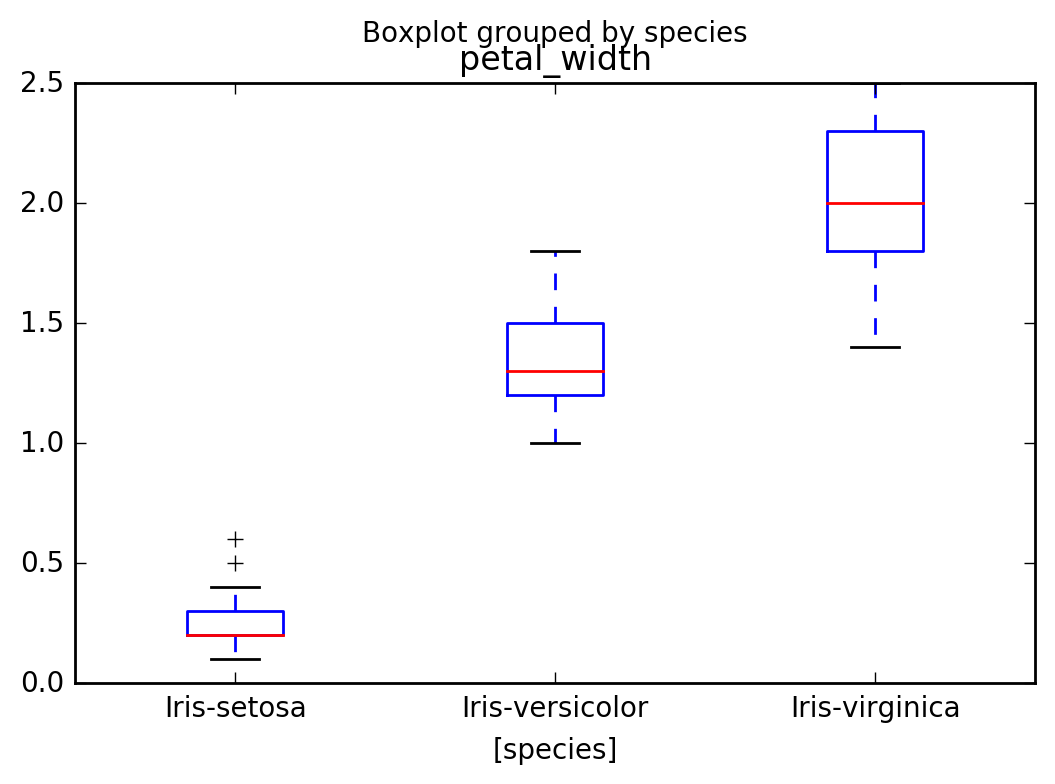

In [78]:
iris[["petal_width","species"]].boxplot(grid=False,by="species")

In [80]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 作业1
   - 画出花萼宽度和长度的散点图，使用品种划分数据

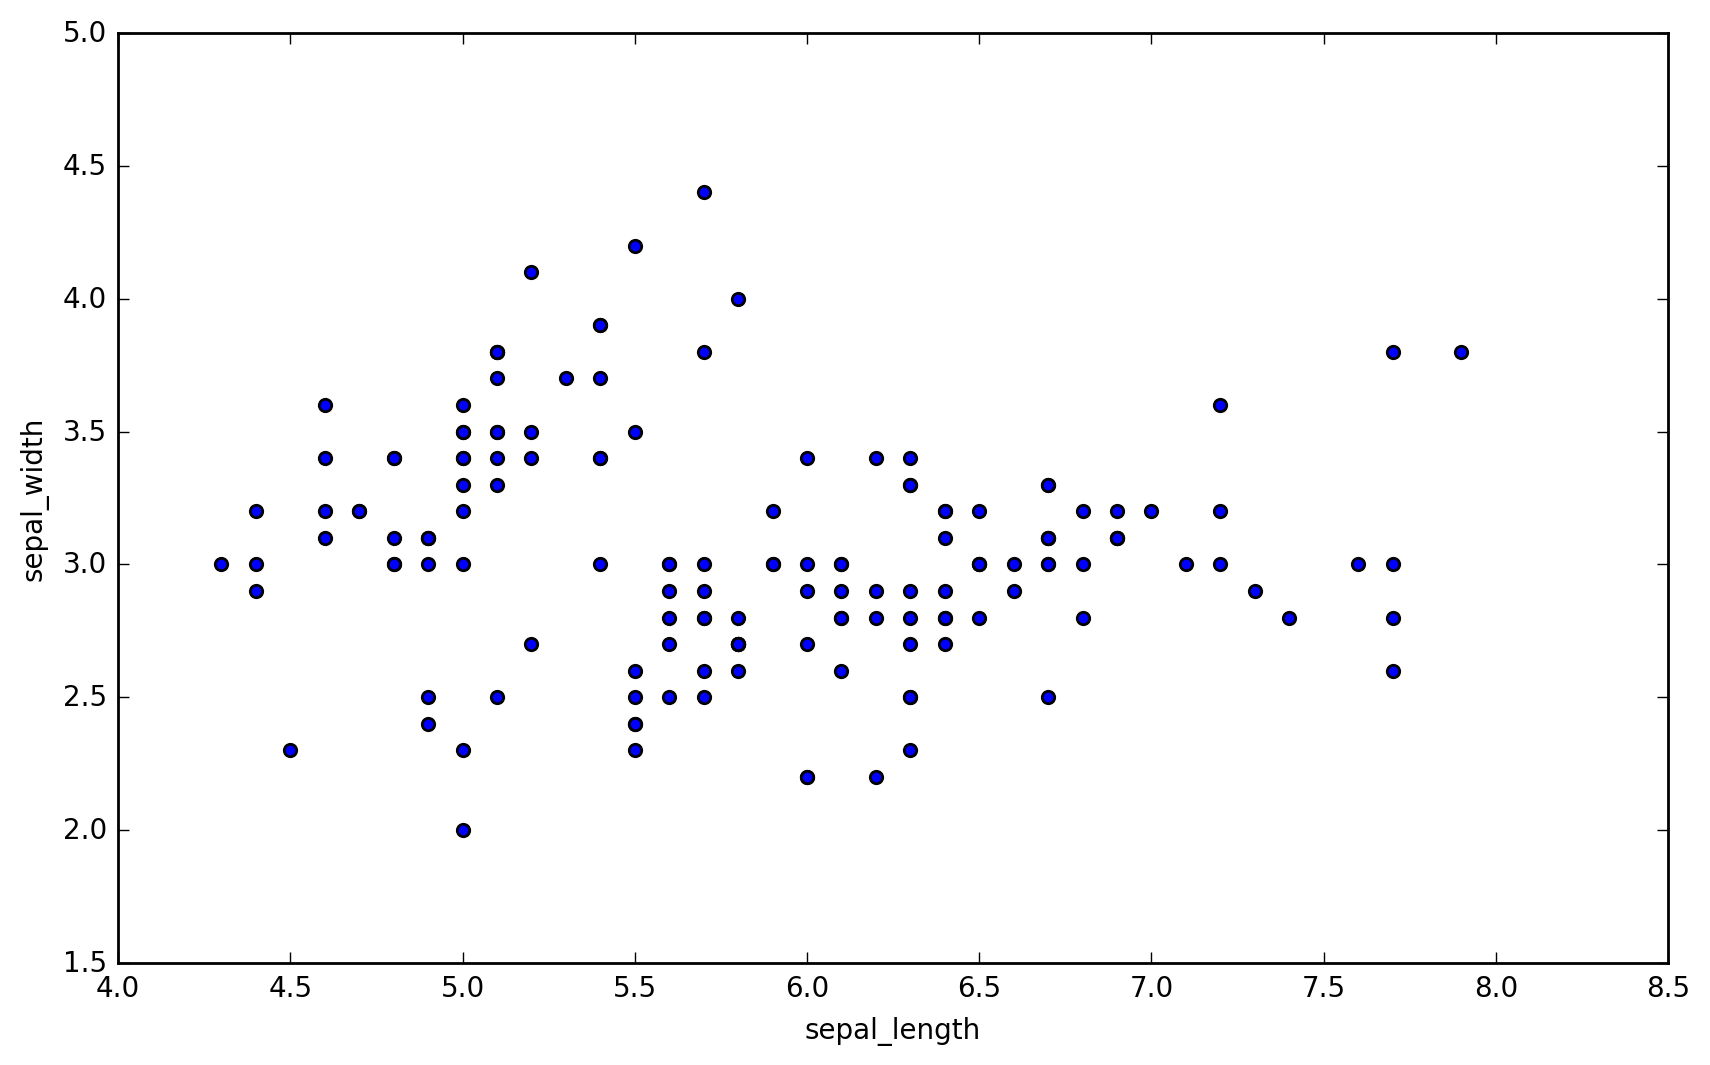

In [82]:
iris.plot(kind="scatter",x="sepal_length",y="sepal_width",figsize=(10,6))

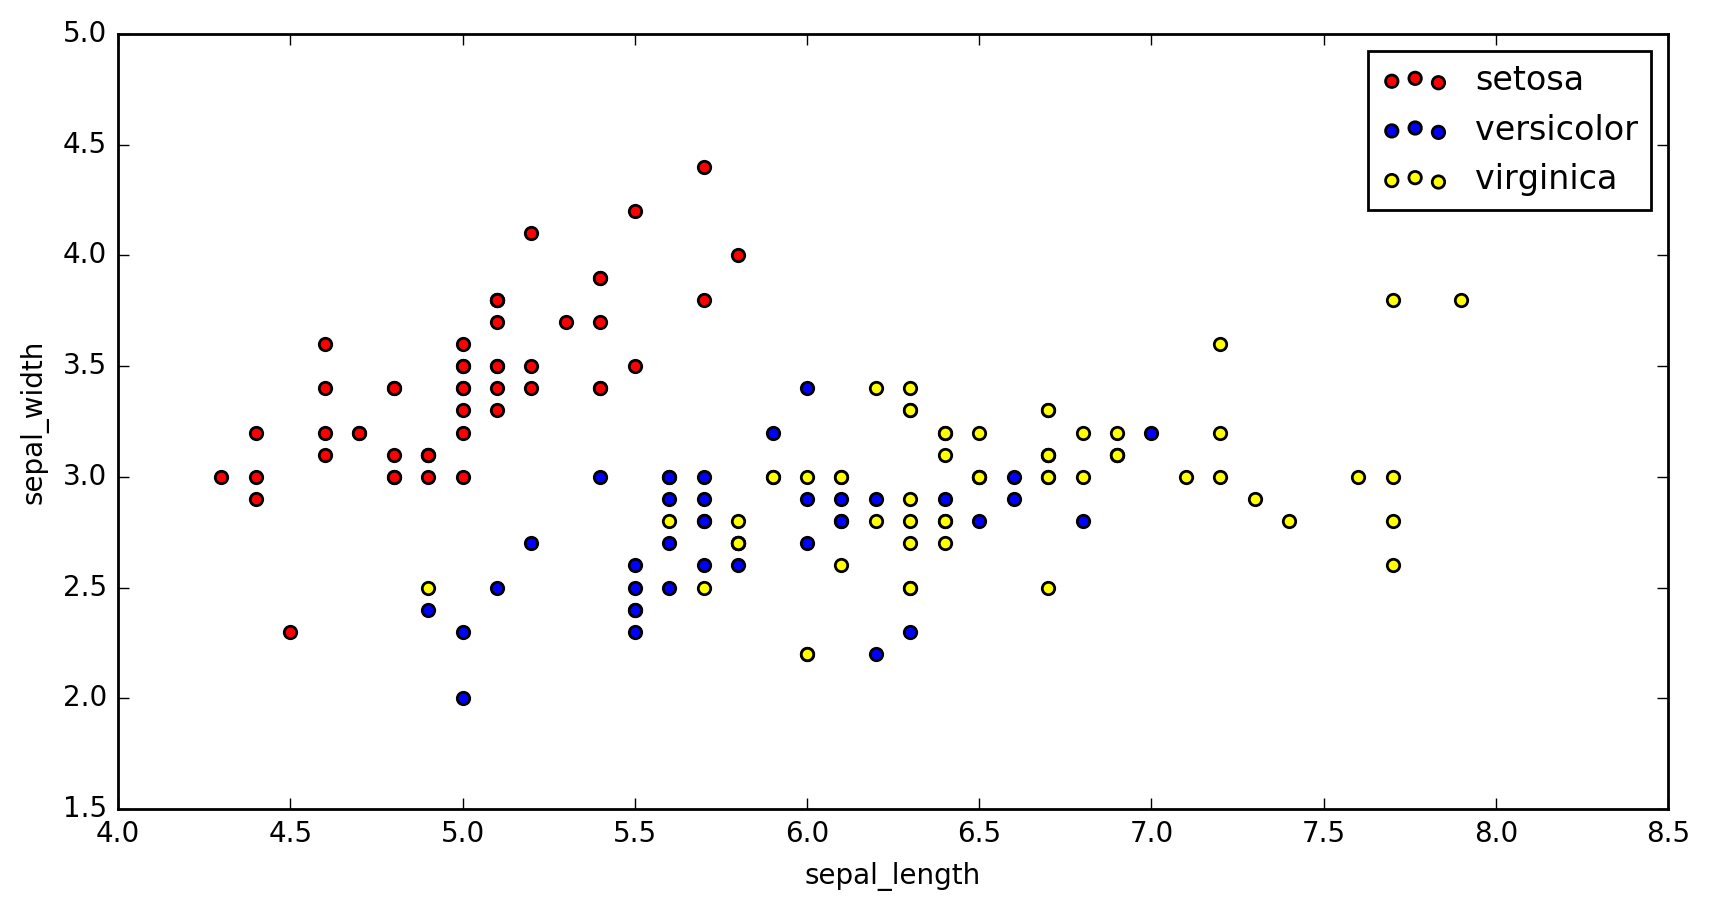

In [90]:
bx=setosa.plot(kind="scatter",x="sepal_length",y="sepal_width",label="setosa",color="red",figsize=(10,5))
versicolor.plot(ax=bx,kind="scatter",x="sepal_length",y="sepal_width",label="versicolor",color="blue")
virginica.plot(ax=bx,kind="scatter",x="sepal_length",y="sepal_width",label="virginica",color="yellow")

In [84]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### 作业2 
  - 画出花萼的长度的箱线图，使用品种划分数据

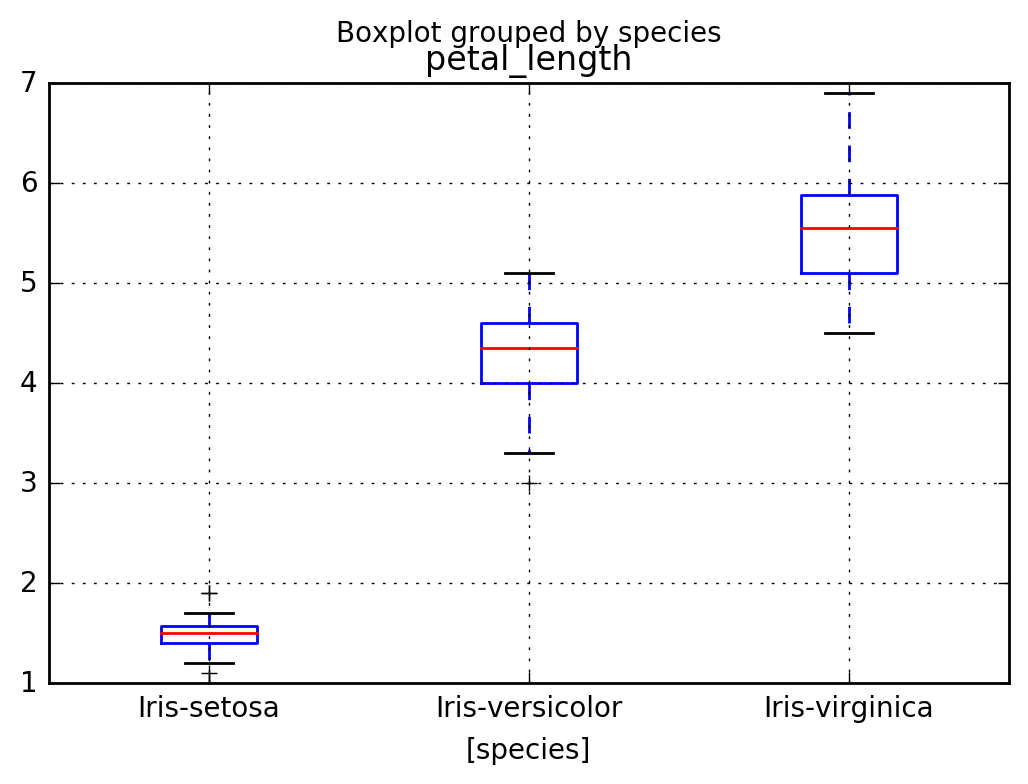

In [94]:
iris[["petal_length","species"]].boxplot(grid=True,by="species")